Method based on https://ml4a.github.io/guides/AudioTSNEViewer/

In [2]:
import librosa
import numpy as np
import os

In [40]:
librosa.util.list_examples()

AVAILABLE EXAMPLES
--------------------------------------------------------------------
brahms    	Brahms - Hungarian Dance #5
choice    	Admiral Bob - Choice (drum+bass)
fishin    	Karissa Hobbs - Let's Go Fishin'
humpback  	Glacier Bay 60-second clip humpback whale song November 2020
libri1    	Ashiel Mystery - A Detective Story, chapter 2, narrated by Garth Comira
libri2    	The Age of Chivalry / Chapter 18: Perceval / Read by Anders Lankford
libri3    	Sense and Sensibility / Chapter 18 / Jane Austen / Read by Heather Barnett
nutcracker	Tchaikovsky - Dance of the Sugar Plum Fairy
pistachio 	The Piano Lady - Pistachio Ice Cream Ragtime
robin     	Bird Whistling, Robin, Single, 13.wav / InspectorJ
sweetwaltz	Setuniman - Sweet Waltz
trumpet   	Mihai Sorohan - Trumpet loop
vibeace   	Kevin MacLeod - Vibe Ace


In [15]:
dir_path = "./sound-creator/output/Kendrick Lamar/To Pimp a Butterfly/"
files = os.listdir(dir_path)
y, sr = librosa.load(os.path.join(dir_path, files[0]))

for file in files[1:]:
    y1, sr = librosa.load(os.path.join(dir_path, file), sr=sr)
    y = np.concatenate((y, y1))

In [ ]:
from IPython.display import Audio
Audio(data=y, rate=sr)

# SFTF Parameters definition

In [11]:
n_fft = 2048
hop_length = 512

# Mel Spectrogram calculation

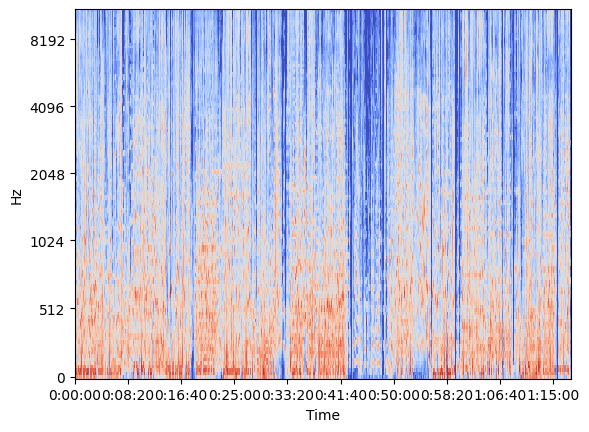

In [17]:
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128, fmax=8000)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)

# MFCCs extraction

In [21]:
mfccs = librosa.feature.mfcc(S=mel_spectrogram)
delta1 = librosa.feature.delta(mfccs)
delta2 = librosa.feature.delta(mfccs)

mfccs = np.concatenate((mfccs, delta1, delta2))

print(mfccs.mean(axis=1).shape)

(60,)


Rede siamesa
Triplet loss